In [1]:
import pandas as pd

#read in files
crime2011 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2011.csv", ",")
crime2012 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2012.csv", ",")
crime2013 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2013.csv", ",")

crime2014 = pd.read_csv("data/timagesopendataarchivescsvnevercrime2014.csv", ",")
crime2015 = pd.read_csv("data/timagesopendataarchivescsvnevercrime2015.csv", ",")

crime2016 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2016.csv", ",")
crime2017 = pd.read_csv("data/timagesopendataarchivescsvmonthlycrime2017.csv", ",")

In [2]:
crime2013.head()

,INCIDENT_TYPE,HUNDRED_BLOCK,MONTH,YEAR
0,Break and Enter - Business,2200 152ND ST,1,2013
1,Break and Enter - Business,12500 82ND AVE,1,2013
2,Break and Enter - Business,13500 77TH AVE,1,2013
3,Break and Enter - Business,15300 56TH AVE,1,2013
4,Break and Enter - Business,2300 152ND ST,1,2013


In [3]:
crime2014.tail()

,CRIME_TYPE,HUNDRED_BLOCK,ROAD_NAME,MONTH,YEAR
26472,Theft from Motor Vehicle,NaN,20TH AVE / 151A ST,12,2014
26473,Fatal/Injury Collision,NaN,64TH AVE / 176TH ST,12,2014
26474,Fatal/Injury Collision,NaN,128TH ST / 84TH AVE,12,2014
26475,Fatal/Injury Collision,NaN,160TH ST / COLEBROOK RD,12,2014
26476,Shoplifting,NaN,100TH AVE / KING GEORGE BLVD,12,2014


In [4]:
#fix the dataset that is a bit different

hundred_block_fixer_lst = []

for i in range(len(crime2014)):
    hundred_block_element = crime2014["HUNDRED_BLOCK"][i]
    road_name_element = crime2014["ROAD_NAME"][i]
    
    if hundred_block_element == hundred_block_element:
        #it is not nan
        transformation = str(hundred_block_element)+ " " + road_name_element
    else:
        transformation = road_name_element
        
        
    hundred_block_fixer_lst.append(transformation)
    
crime2014["HUNDRED_BLOCK"] = hundred_block_fixer_lst
crime2014 = crime2014.drop('ROAD_NAME', 1)

In [94]:
crime2014.to_csv('/Users/gk/Desktop/code_july/crime_app/crime_python/data/crime_2014_fixed.csv')

In [7]:
#some of the names appear without being stripped in the database...

crime2011['HUNDRED_BLOCK'] = crime2011['HUNDRED_BLOCK'].apply(lambda hundred_block: hundred_block.strip())
crime2012['HUNDRED_BLOCK'] = crime2012['HUNDRED_BLOCK'].apply(lambda hundred_block: hundred_block.strip())
crime2013['HUNDRED_BLOCK'] = crime2013['HUNDRED_BLOCK'].apply(lambda hundred_block: hundred_block.strip())
crime2014['HUNDRED_BLOCK'] = crime2014['HUNDRED_BLOCK'].apply(lambda hundred_block: hundred_block.strip())
crime2015['HUNDRED_BLOCK'] = crime2015['HUNDRED_BLOCK'].apply(lambda hundred_block: hundred_block.strip())
crime2016['HUNDRED_BLOCK'] = crime2016['HUNDRED_BLOCK'].apply(lambda hundred_block: str(hundred_block).strip())

In [8]:
#see the different incident types, same across years. exclude 'Fatal/Injury Collision'
crime2011['INCIDENT_TYPE'].unique()

array(['Break and Enter - Business', 'Break and Enter - Residence',
       'Fatal/Injury Collision', 'Shoplifting', 'Theft from Motor Vehicle',
       'Theft of Motor Vehicle'], dtype=object)

In [9]:
crime2014['CRIME_TYPE'].unique()

array(['Theft of Motor Vehicle', 'Theft from Motor Vehicle',
       'Fatal/Injury Collision', 'Break and Enter - Business',
       'Shoplifting', 'Break and Enter - Residence'], dtype=object)

In [10]:
#group the datasets by the location, and count the number of occurences of incidents (for each type)   , reset index beacuse, for every year, i perform a outer join HUNDREDREC_BLOCK to merge the datasets

#2011
crime2011_grouped_by_BaEB = crime2011[crime2011['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2011_grouped_by_BaER = crime2011[crime2011['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2011_grouped_by_shoplifting = crime2011[crime2011['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2011_grouped_by_TfMV = crime2011[crime2011['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2011_grouped_by_ToMV = crime2011[crime2011['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2011_grouped_by_incident_type_merged = crime2011_grouped_by_BaEB.merge(crime2011_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2011_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2011_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2011_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2012
crime2012_grouped_by_BaEB = crime2012[crime2012['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2012_grouped_by_BaER = crime2012[crime2012['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2012_grouped_by_shoplifting = crime2012[crime2012['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2012_grouped_by_TfMV = crime2012[crime2012['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2012_grouped_by_ToMV = crime2012[crime2012['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2012_grouped_by_incident_type_merged = crime2012_grouped_by_BaEB.merge(crime2012_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2012_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2012_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2012_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2013
crime2013_grouped_by_BaEB = crime2013[crime2013['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2013_grouped_by_BaER = crime2013[crime2013['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2013_grouped_by_shoplifting = crime2013[crime2013['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2013_grouped_by_TfMV = crime2013[crime2013['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2013_grouped_by_ToMV = crime2013[crime2013['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2013_grouped_by_incident_type_merged = crime2013_grouped_by_BaEB.merge(crime2013_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2013_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2013_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2013_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')


#2014
crime2014_grouped_by_BaEB = crime2014[crime2014['CRIME_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2014_grouped_by_BaER = crime2014[crime2014['CRIME_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2014_grouped_by_shoplifting = crime2014[crime2014['CRIME_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2014_grouped_by_TfMV = crime2014[crime2014['CRIME_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2014_grouped_by_ToMV = crime2014[crime2014['CRIME_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['CRIME_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2014_grouped_by_incident_type_merged = crime2014_grouped_by_BaEB.merge(crime2014_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2014_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2014_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2014_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')


#2015
crime2015_grouped_by_BaEB = crime2015[crime2015['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2015_grouped_by_BaER = crime2015[crime2015['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2015_grouped_by_shoplifting = crime2015[crime2015['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2015_grouped_by_TfMV = crime2015[crime2015['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2015_grouped_by_ToMV = crime2015[crime2015['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2015_grouped_by_incident_type_merged = crime2015_grouped_by_BaEB.merge(crime2015_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2015_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2015_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2015_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2016
crime2016_grouped_by_BaEB = crime2016[crime2016['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2016_grouped_by_BaER = crime2016[crime2016['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2016_grouped_by_shoplifting = crime2016[crime2016['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2016_grouped_by_TfMV = crime2016[crime2016['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2016_grouped_by_ToMV = crime2016[crime2016['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2016_grouped_by_incident_type_merged = crime2016_grouped_by_BaEB.merge(crime2016_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2016_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2016_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2016_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

#2017
crime2017_grouped_by_BaEB = crime2017[crime2017['INCIDENT_TYPE'] == 'Break and Enter - Business' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Business').reset_index()
crime2017_grouped_by_BaER = crime2017[crime2017['INCIDENT_TYPE'] == 'Break and Enter - Residence' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Break and Enter - Residence').reset_index()
crime2017_grouped_by_shoplifting = crime2017[crime2017['INCIDENT_TYPE'] == 'Shoplifting' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Shoplifting').reset_index()
crime2017_grouped_by_TfMV = crime2017[crime2017['INCIDENT_TYPE'] == 'Theft from Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft from Motor Vehicle').reset_index()
crime2017_grouped_by_ToMV = crime2017[crime2017['INCIDENT_TYPE'] == 'Theft of Motor Vehicle' ] .groupby(['HUNDRED_BLOCK', 'YEAR', 'MONTH'])['INCIDENT_TYPE'].size().to_frame('Theft of Motor Vehicle').reset_index()

crime2017_grouped_by_incident_type_merged = crime2017_grouped_by_BaEB.merge(crime2017_grouped_by_BaER, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2017_grouped_by_shoplifting, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2017_grouped_by_TfMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer').merge(crime2017_grouped_by_ToMV, on=["HUNDRED_BLOCK", "YEAR", "MONTH"], how='outer')

In [12]:
#crime2014_grouped_by_incident_type_merged

In [13]:
crime2017_grouped_by_incident_type_merged.tail()
#NaN means that for that hundred block, year and month, there was no occurance of ex shoplifting

,HUNDRED_BLOCK,YEAR,MONTH,Break and Enter - Business,Break and Enter - Residence,Shoplifting,Theft from Motor Vehicle,Theft of Motor Vehicle
4490,HO00 RD / 88TH AVE,2017.0,3.0,NaN,NaN,NaN,NaN,1.0
4491,KING GEORGE BLVD / 164TH ST,2017.0,2.0,NaN,NaN,NaN,NaN,1.0
4492,KING GEORGE BLVD / 84TH AVE,2017.0,4.0,NaN,NaN,NaN,NaN,1.0
4493,SPENS00 DR / 148A ST,2017.0,3.0,NaN,NaN,NaN,NaN,1.0
4494,WHALLEY BLVD / 104TH AVE,2017.0,3.0,NaN,NaN,NaN,NaN,1.0


In [14]:
#crime2011_grouped_by_incident_type.merge(crime2012_grouped_by_incident_type, on=['HUNDRED_BLOCK'], how='outer')
frames = [crime2011_grouped_by_incident_type_merged, crime2012_grouped_by_incident_type_merged, crime2013_grouped_by_incident_type_merged, crime2014_grouped_by_incident_type_merged, crime2015_grouped_by_incident_type_merged, crime2016_grouped_by_incident_type_merged]

concatenated_dfs = pd.concat(frames).sort_values(['YEAR'], ascending=False).sort_values(['MONTH'], ascending=True).sort_values(['HUNDRED_BLOCK'])

In [15]:
#instead of NaN i want zeros
concatenated_dfs = concatenated_dfs.fillna(0)

concatenated_dfs.tail()


,HUNDRED_BLOCK,YEAR,MONTH,Break and Enter - Business,Break and Enter - Residence,Shoplifting,Theft from Motor Vehicle,Theft of Motor Vehicle
10372,WHALLEY BLVD / GROSVENOR RD,2016.0,3.0,0.0,0.0,0.0,1.0,0.0
9206,WICKSON RD / MCBRIDE AVE,2012.0,3.0,0.0,0.0,0.0,1.0,0.0
8773,WILDWOOD PL / 85TH AVE,2011.0,3.0,0.0,0.0,0.0,1.0,0.0
11319,WINTER CRES / KING GEORGE BLVD,2014.0,11.0,0.0,0.0,0.0,1.0,0.0
10373,WINTER CRES / KING GEORGE BLVD,2016.0,1.0,0.0,0.0,0.0,1.0,1.0


In [16]:
#collect adresses that need to be geolocated
adressess = concatenated_dfs['HUNDRED_BLOCK'].unique()
len(adressess)

12090

In [135]:
#geocode (OBS! takes approx 2 h to run script)
import requests
import time

adresses_geocoded = []
for adress in adressess:
    
    formatted_adress = adress.replace("/", "%26").replace(" ", "%20")
    url = "https://apps.gov.bc.ca/pub/geocoder/addresses.json?addressString={}&locationDescriptor=any&maxResults=1&interpolation=adaptive&echo=true&outputSRS=4326&minScore=1&provinceCode=BC".format(formatted_adress)
    r = requests.get(url)
    adress_geocoded = r.json()['features'][0]['geometry']['coordinates']
    adresses_geocoded.append(adress_geocoded)
    
    #do not want to overload the api
    if len(adresses_geocoded) % 1000 == 0: 
        time.sleep(5)

In [50]:
adresses_geocoded_df = pd.DataFrame(data={'HUNDRED_BLOCK': adressess, 'HUNDRED_BLOCK_GEOCODED': adresses_geocoded})

In [142]:
adresses_geocoded_df.tail()

,HUNDRED_BLOCK,HUNDRED_BLOCK_GEOCODED
26714,WHALLEY BLVD \ SKYTRAIN ACCESS,"[-122.7452849, 53.913051]"
26715,WICKSON RD / MCBRIDE AVE,"[-122.8825118, 49.0587981]"
26716,WILDWOOD PL / 85TH AVE,"[-122.7511057, 49.1572491]"
26717,WILTSHIRE DR / 76TH AVE,"[-122.8191898, 49.1410138]"
26718,WINTER CRES / KING GEORGE BLVD,"[-122.8188893, 49.0660495]"


In [51]:
# make data frame and export it, then plot the datapoints

In [146]:
#export this. good to have.
adresses_geocoded_df.to_csv('/Users/gk/Desktop/code_july/crime_app/crime_python/data/adresses_geocoded.csv')

In [15]:
pwd

'/Users/gk/Desktop/code_july/crime_app/crime_python'

In [17]:
adresses_geocoded_df=pd.read_csv('/Users/gk/Desktop/code_july/crime_app/crime_python/data/adresses_geocoded.csv')

In [18]:
#update concatatenated dfs so they have the geocode info
concatenated_dfs = concatenated_dfs.merge(adresses_geocoded_df, on='HUNDRED_BLOCK')

In [19]:
concatenated_dfs.tail()

,HUNDRED_BLOCK,YEAR,MONTH,Break and Enter - Business,Break and Enter - Residence,Shoplifting,Theft from Motor Vehicle,Theft of Motor Vehicle,Unnamed: 0,HUNDRED_BLOCK_GEOCODED
67872,WHALLEY BLVD / GROSVENOR RD,2016.0,3.0,0.0,0.0,0.0,1.0,0.0,26713,"[-122.8438083, 49.1999353]"
67873,WICKSON RD / MCBRIDE AVE,2012.0,3.0,0.0,0.0,0.0,1.0,0.0,26715,"[-122.8825118, 49.0587981]"
67874,WILDWOOD PL / 85TH AVE,2011.0,3.0,0.0,0.0,0.0,1.0,0.0,26716,"[-122.7511057, 49.1572491]"
67875,WINTER CRES / KING GEORGE BLVD,2014.0,11.0,0.0,0.0,0.0,1.0,0.0,26718,"[-122.8188893, 49.0660495]"
67876,WINTER CRES / KING GEORGE BLVD,2016.0,1.0,0.0,0.0,0.0,1.0,1.0,26718,"[-122.8188893, 49.0660495]"


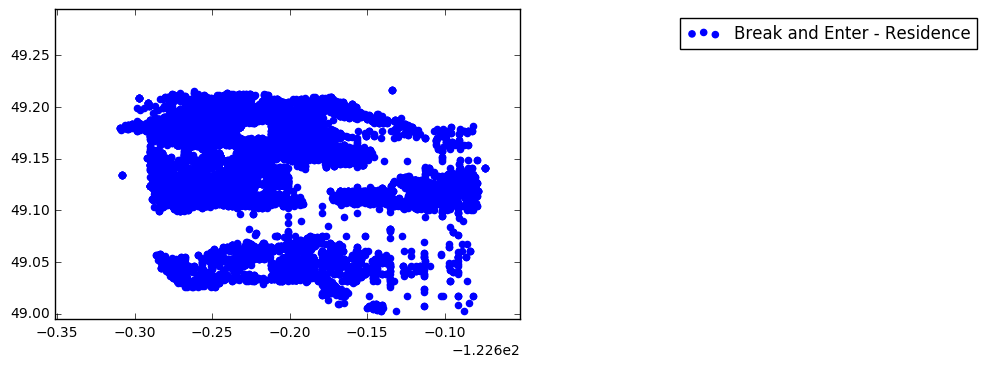

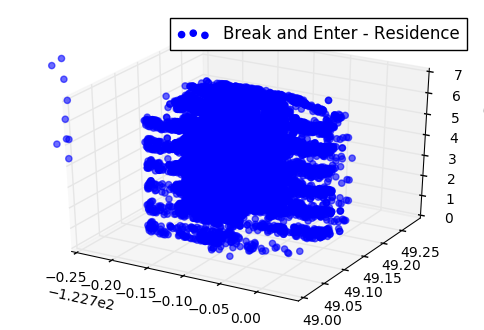

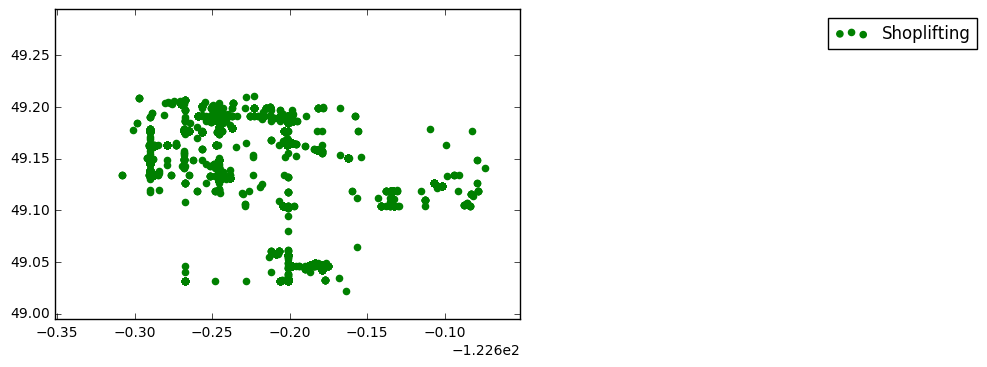

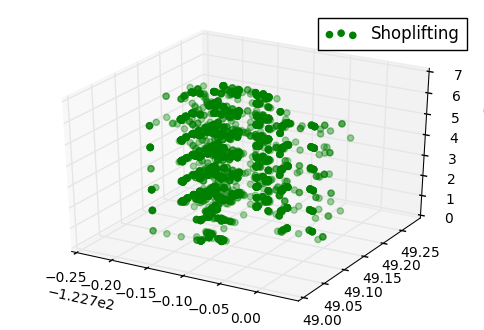

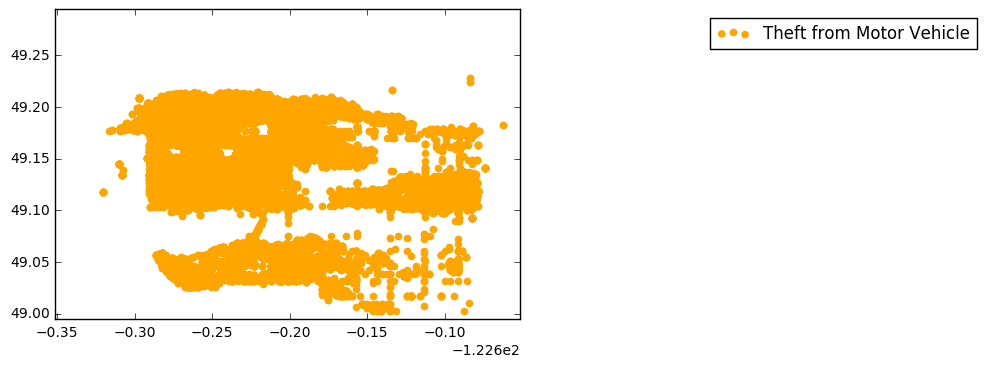

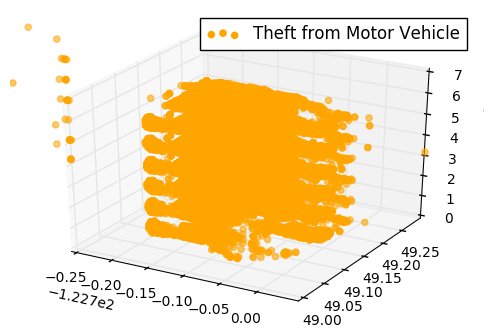

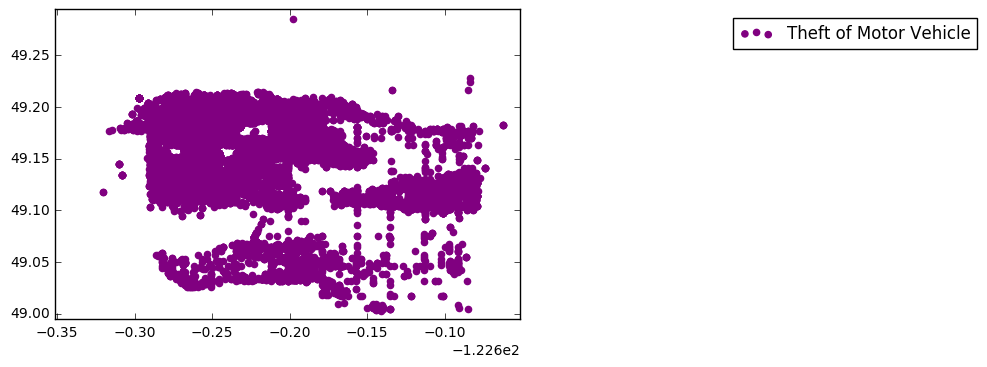

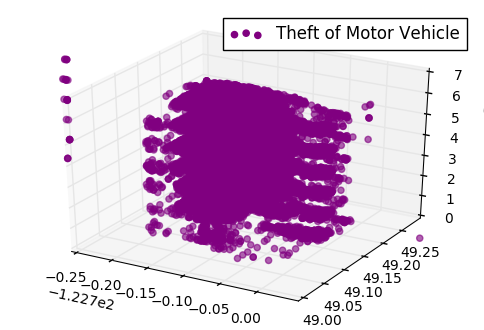

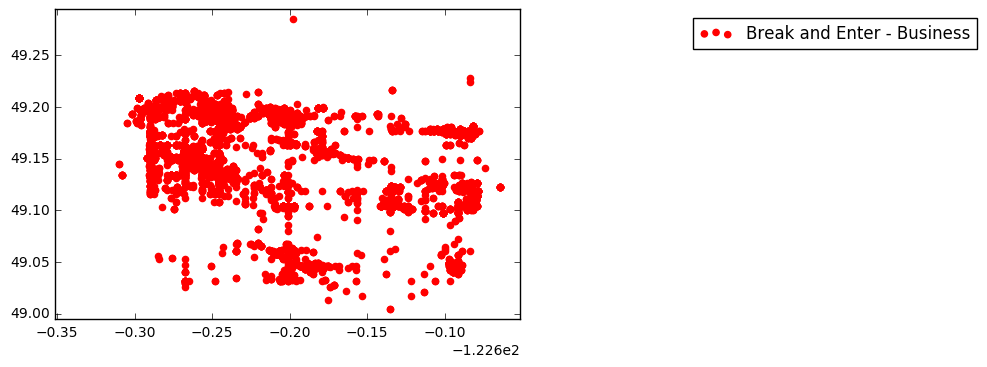

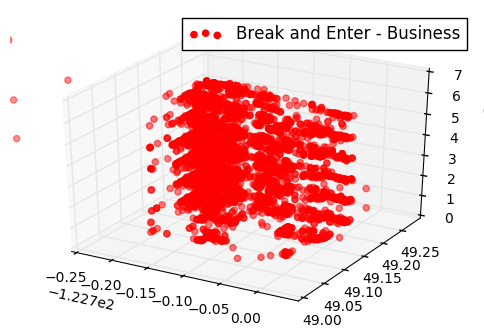

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

incident_types = ['Break and Enter - Residence', 'Shoplifting', 'Theft from Motor Vehicle','Theft of Motor Vehicle', 'Break and Enter - Business']
colors = ['blue', 'green', 'orange', 'purple', 'red']

for i in range(len(incident_types)):
    incident_type = incident_types[i]
    color = colors[i]
    plot_df = concatenated_dfs[[incident_type, 'HUNDRED_BLOCK_GEOCODED', "YEAR", "MONTH"]][concatenated_dfs[incident_type] >= 1]
    
    

    longitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[0])
    latitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[1])
    
    plt.scatter(longitude, latitude, label=incident_type, color=color)
    
    distance_from_center = 0.15
    x_center = -122.801094
    y_center = 49.14443
    plt.axis([x_center - distance_from_center, x_center + distance_from_center, y_center - distance_from_center, y_center + distance_from_center])
    
    plt.legend(bbox_to_anchor=(2, 1))
    plt.savefig('data/images/space_{}.png'.format(incident_type))
    plt.show()
    
     #time = plot_df["YEAR"] +"-"+ plot_df["MONTH"]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(longitude.values, latitude.values , plot_df["YEAR"].values, label=incident_type, color=color)
    plt.axis([x_center - distance_from_center, x_center + distance_from_center, y_center - distance_from_center, y_center + distance_from_center])
    ax.legend()
    plt.savefig('data/images/space_time_{}.png'.format(incident_type))
    plt.show()
    
    
    #the scatter plots show datapoints where more or equal than 1 of incident type has occured

In [240]:
#interesting!

In [ ]:
#now do some preliminary plottin to get a idea of  how it seems to change over years

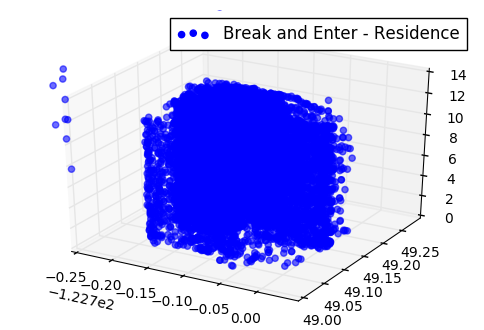

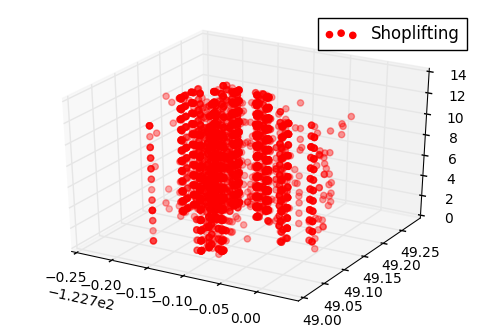

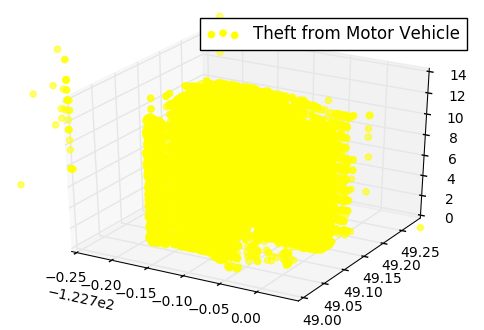

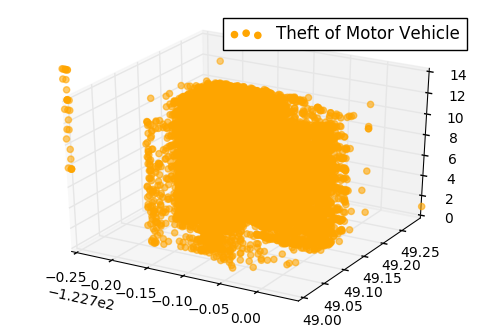

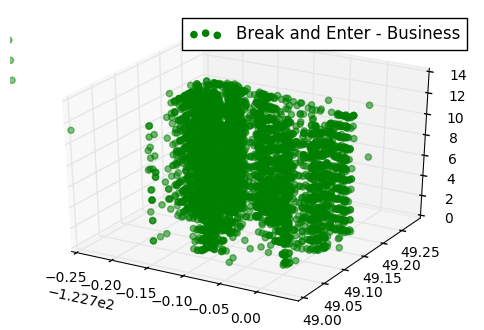

In [34]:
from mpl_toolkits.mplot3d import Axes3D


incident_types = ['Break and Enter - Residence', 'Shoplifting', 'Theft from Motor Vehicle','Theft of Motor Vehicle', 'Break and Enter - Business']
colors = ['blue', 'red', 'yellow', 'orange', 'green']
for i in range(len(incident_types)):
    incident_type = incident_types[i]
    color = colors[i]
    plot_df = concatenated_dfs[[incident_type, 'HUNDRED_BLOCK_GEOCODED', "YEAR", "MONTH"]][concatenated_dfs[incident_type] >= 1]
    
    

    longitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[0])
    latitude = plot_df['HUNDRED_BLOCK_GEOCODED'].apply(lambda x: eval(x)[1])
    time = plot_df.apply(lambda row: datetime(int(row["YEAR"]), int(row["MONTH"]), 1 ) , axis = 1)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(longitude.values, latitude.values , plot_df["MONTH"], label=incident_type, color=color)
    
    distance_from_center = 0.15
    x_center = -122.801094
    y_center = 49.14443
    plt.axis([x_center - distance_from_center, x_center + distance_from_center, y_center - distance_from_center, y_center + distance_from_center])
    
    ax.legend()
    plt.show()
    #the scatter plots show datapoints where more or equal than 1 of incident type has occured

In [35]:
del concatenated_dfs['Unnamed: 0'] 

In [36]:
concatenated_dfs['Total Crime'] = concatenated_dfs.apply(lambda row: row['Break and Enter - Business'] + row['Break and Enter - Residence'] + row['Shoplifting'] + row['Theft from Motor Vehicle'] + row['Theft of Motor Vehicle'] , axis=1, )

In [37]:
len(concatenated_dfs)

67877

In [109]:
#export this. this is the dataset that i will use for populating the mongodb database on the app.
concatenated_dfs.to_csv('/Users/gk/Desktop/code_july/crime_app/crime_python/data/crimelocations.csv')

In [119]:
k_means_clustered_df = pd.DataFrame()
total_crimes_arr = concatenated_dfs['Total Crime'].values
for i in range(len(concatenated_dfs['Total Crime'].values)):
    row = concatenated_dfs.iloc[i]
    crime = row['Total Crime']
    for j in range(int(crime)):
        k_means_clustered_df.append(row)
        
        

In [100]:
from sklearn.cluster import KMeans


k_means_data = concatenated_dfs['HUNDRED_BLOCK_GEOCODED'].apply(lambda geoloc: eval(geoloc) )

In [110]:
k_means_data.values
X = []
for value in k_means_data.values:
    lst = [float(value[0]), float(value[1])]
    X.append(lst)
    
    
X = np.array(X)    

In [111]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

In [115]:
cluster_centers = kmeans.cluster_centers_

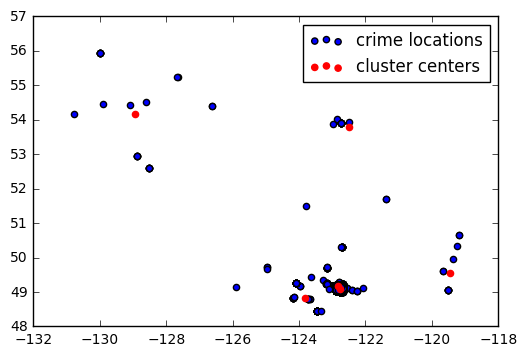

In [117]:
plt.scatter(X[:,0], X[:,1], label = 'crime locations')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='red', label = 'cluster centers')
plt.legend()
plt.show()

In [38]:
import matplotlib.pyplot as plt

In [39]:
yearly_crime_aggregated = concatenated_dfs.groupby(['YEAR','MONTH'])['Break and Enter - Business', 'Break and Enter - Residence',
       'Shoplifting', 'Theft from Motor Vehicle',
       'Theft of Motor Vehicle', 'Total Crime'].sum()

In [40]:
yearly_crime_aggregated

Break and Enter - Business  Break and Enter - Residence  \
YEAR   MONTH                                                            
2011.0 1.0                         110.0                        177.0   
       2.0                         107.0                        126.0   
       3.0                         113.0                        179.0   
       4.0                          79.0                        169.0   
       5.0                          96.0                        140.0   
       6.0                         107.0                        134.0   
       7.0                         134.0                        145.0   
       8.0                         140.0                        193.0   
       9.0                         117.0                        192.0   
       10.0                        104.0                        169.0   
       11.0                         93.0                        154.0   
       12.0                        110.0                        132.0   
2012.0 1.0                         110.0                        211.0   
       2.0                          67.0                        167.0   
       3.0                          95.0                        152.0   
       4.0                          99.0                        127.0   
       5.0                         103.0                        124.0   
       6.0                          99.0                        194.0   
       7.0                          73.0                        172.0   
       8.0                          85.0                        143.0   
       9.0                          66.0                        163.0   
       10.0                         78.0                        187.0   
       11.0                         89.0                        201.0   
       12.0                        114.0                        207.0   
2013.0 1.0                          93.0                        213.0   
       2.0                          90.0                        134.0   
       3.0                         116.0                        137.0   
       4.0                         112.0                        124.0   
       5.0                         113.0                        143.0   
       6.0                         111.0                        173.0   
...                                  ...                          ...   
2014.0 7.0                          91.0                        231.0   
       8.0                         122.0                        288.0   
       9.0                          71.0                        261.0   
       10.0                         67.0                        230.0   
       11.0                         63.0                        235.0   
       12.0                         97.0                        218.0   
2015.0 1.0                         107.0                        247.0   
       2.0                         109.0                        173.0   
       3.0                         108.0                        141.0   
       4.0                          73.0                        148.0   
       5.0                          75.0                        152.0   
       6.0                         102.0                        175.0   
       7.0                          78.0                        205.0   
       8.0                         118.0                        180.0   
       9.0                         142.0                        176.0   
       10.0                        120.0                        161.0   
       11.0                         98.0                        144.0   
       12.0                        100.0                        187.0   
2016.0 1.0                         104.0                        162.0   
       2.0                          87.0                        152.0   
       3.0                          77.0                        186.0   
       4.0                          78.0                        155.0   

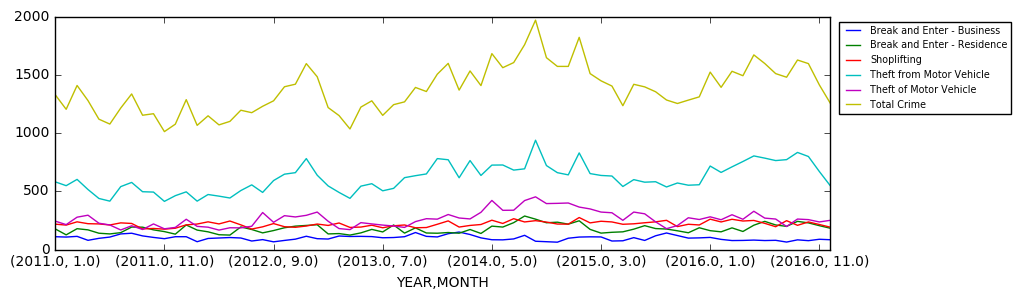

In [100]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('x-small')
  
    
yearly_crime_aggregated.plot(figsize=(10,3))
lgd = plt.legend(bbox_to_anchor=(1.24, 1), prop = fontP)
plt.savefig('data/images/all_crime_all_years.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.savefig('data/images/all_crime_all_years.png', )
plt.show()


In [102]:


#theft from motor vehicle accounts for approx half of crime, for the entire time period.


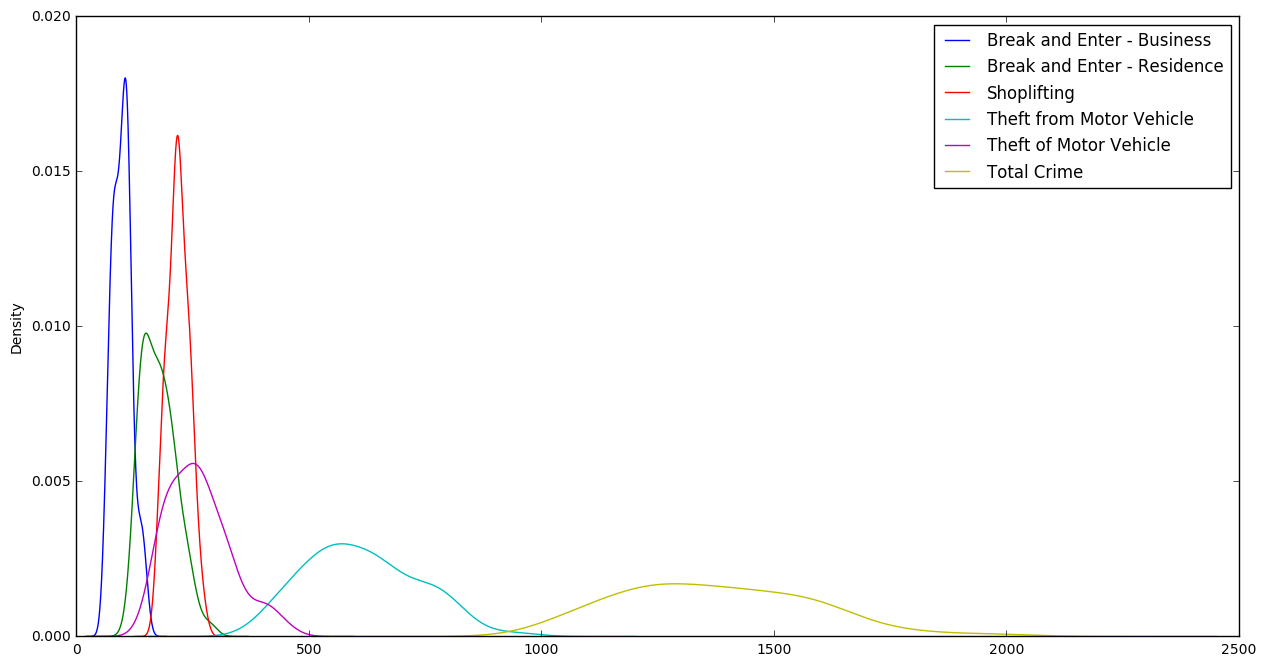

In [112]:
yearly_crime_aggregated.plot(kind='density', figsize=(15,8))
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('data/images/empirical_density_functions')
plt.show()

In [ ]:
#if we plot the empirical probability distribution functions for all types we can see that they all are are roughly normal distributed but with different means and standard deviations.

#The types BaE-B, BaE-R,Shoplifting have a low standard deviation, and a low mean. This means that each month, the number of occurences of these types is stable around the mean.

#Total Crime has a higher mean and a higher variance. This is driven by TfMV (as stated earlier, tfMV accounts for approx half of all crime)

Total Crime roughly seem to be normal distributed over the time period
 #this means that each month, on average, has about ~1400 crimes

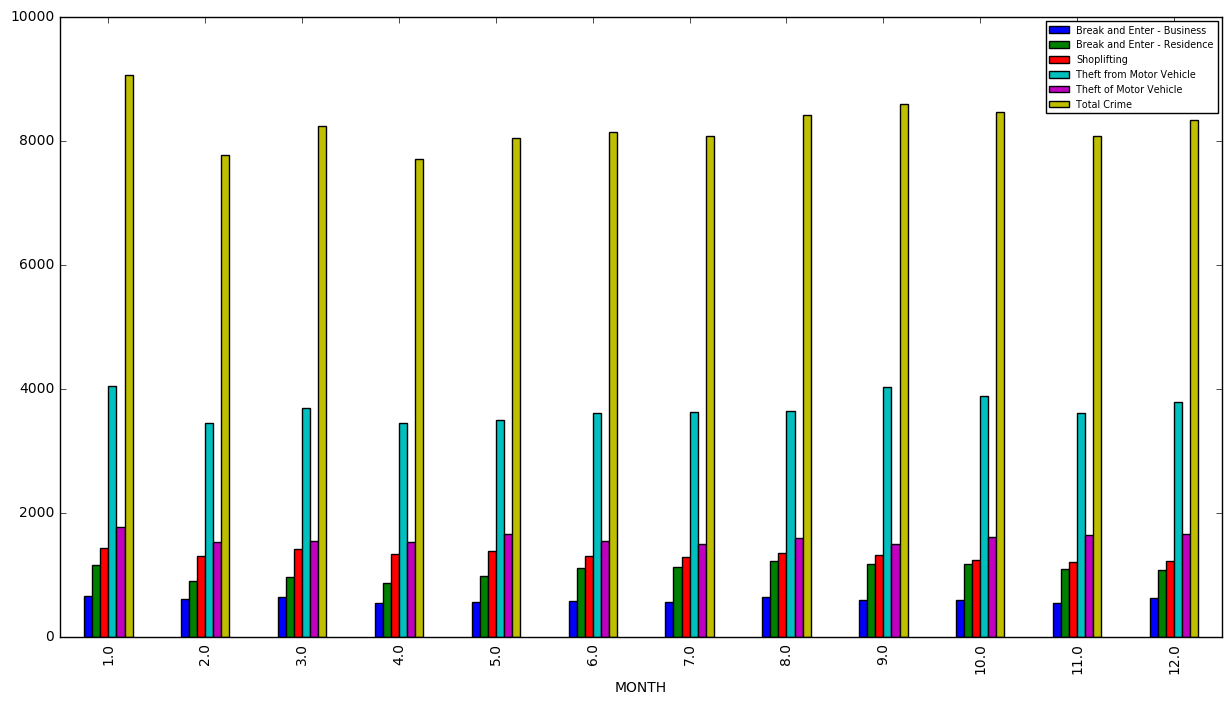

In [122]:
monthly_crime_aggregated = concatenated_dfs.groupby(['MONTH'])['Break and Enter - Business', 'Break and Enter - Residence',
       'Shoplifting', 'Theft from Motor Vehicle',
       'Theft of Motor Vehicle', 'Total Crime'].sum()

monthly_crime_aggregated.plot(kind='bar', figsize=(15,8))
plt.legend(bbox_to_anchor=(1, 1), prop=fontP)
plt.savefig('data/images/monthly_crime_aggregated')
plt.show()

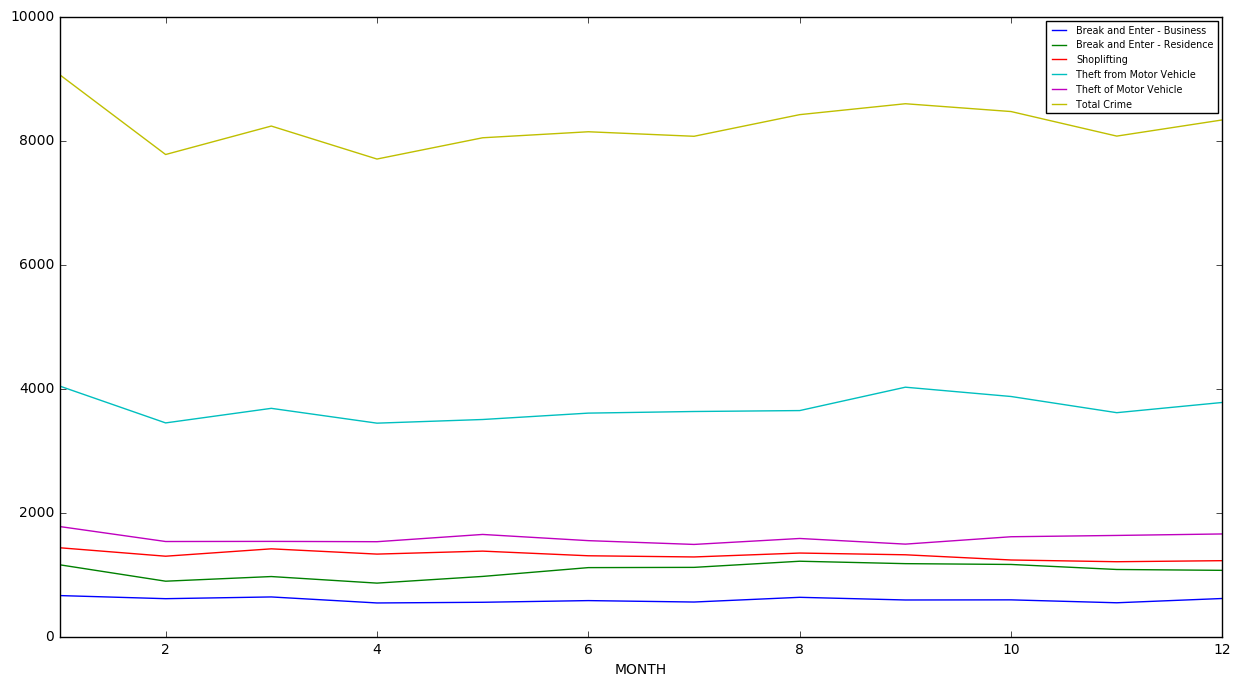

In [123]:
monthly_crime_aggregated = concatenated_dfs.groupby(['MONTH'])['Break and Enter - Business', 'Break and Enter - Residence',
       'Shoplifting', 'Theft from Motor Vehicle',
       'Theft of Motor Vehicle', 'Total Crime'].sum()

monthly_crime_aggregated.plot(kind='line', figsize=(15,8))
plt.legend(bbox_to_anchor=(1, 1), prop=fontP)
plt.savefig('data/images/monthly_crime_aggregated_line')
plt.show()

In [125]:
#above claims is supported by this graph. In addition, the graph shows crime is decreasing in the beginning of the year, and starts to increase at the end of the year.

In [ ]:
#To say more about the above statements, one needs more domain specific knowledge.

In [ ]:
#is still possible with for example weekday variability. but this can currently not be discerned due to the granularity of the datasets.